# Colon Disease Image Classification Model

In [1]:
#Importing nessecary packages
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio.v2 as imageio
from pathlib import Path 
import cv2
import glob
import skimage
from skimage.color import rgb2gray, gray2rgb
import tensorflow as tf
import keras
import pydot
import keras.utils
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization

## Data Exploration

In [2]:
#test image
def show_imgs(img_folder):
    for i in range(6):
        file = random.choice(os.listdir(img_folder))
        image_path= os.path.join(img_folder, file)
        img=mpimg.imread(image_path)
        ax=plt.subplot(1,6,i+1)
        ax.title.set_text(file)
        plt.imshow(img)

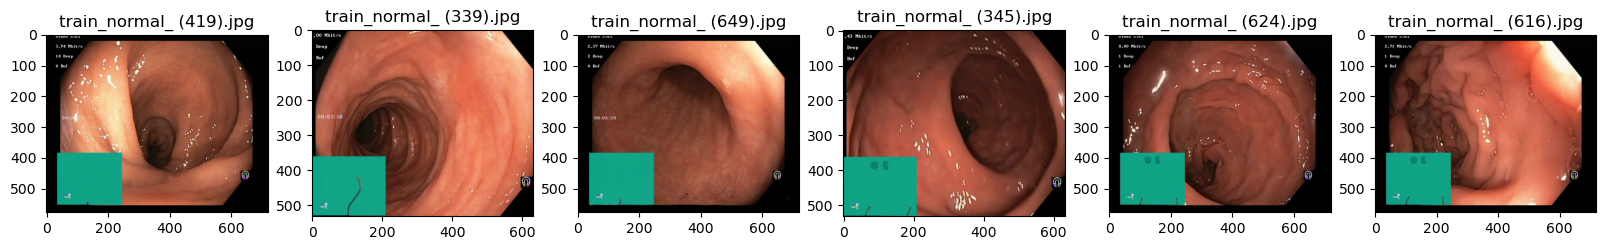

In [3]:
normal_train_folder=r'colon-image-data/train/0_normal'
plt.figure(figsize=(20, 20))
show_imgs(normal_train_folder)

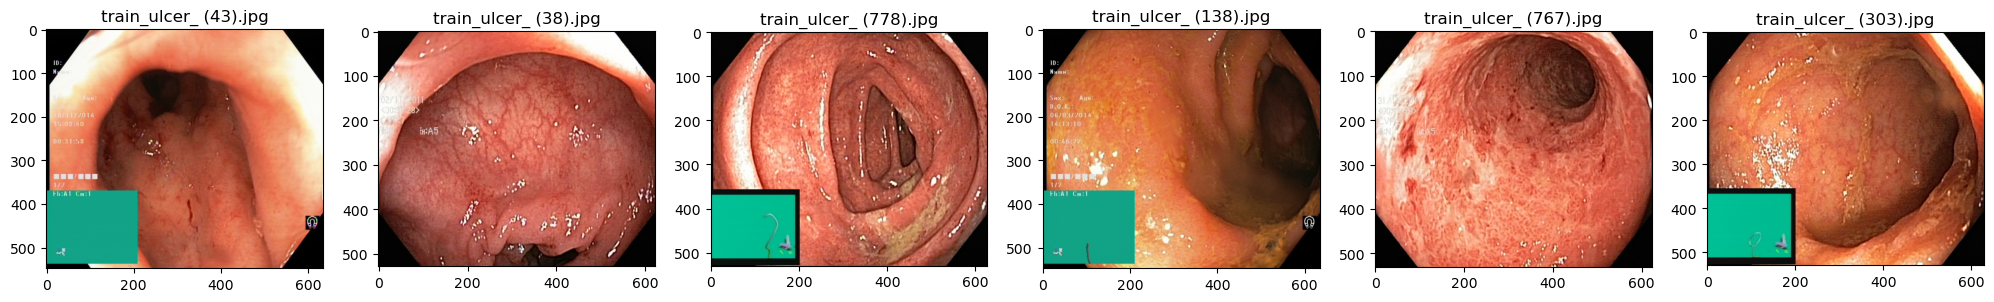

In [4]:
uc_train_folder=r'colon-image-data/train/1_ulcerative_colitis'
plt.figure(figsize=(25, 25))
show_imgs(uc_train_folder)

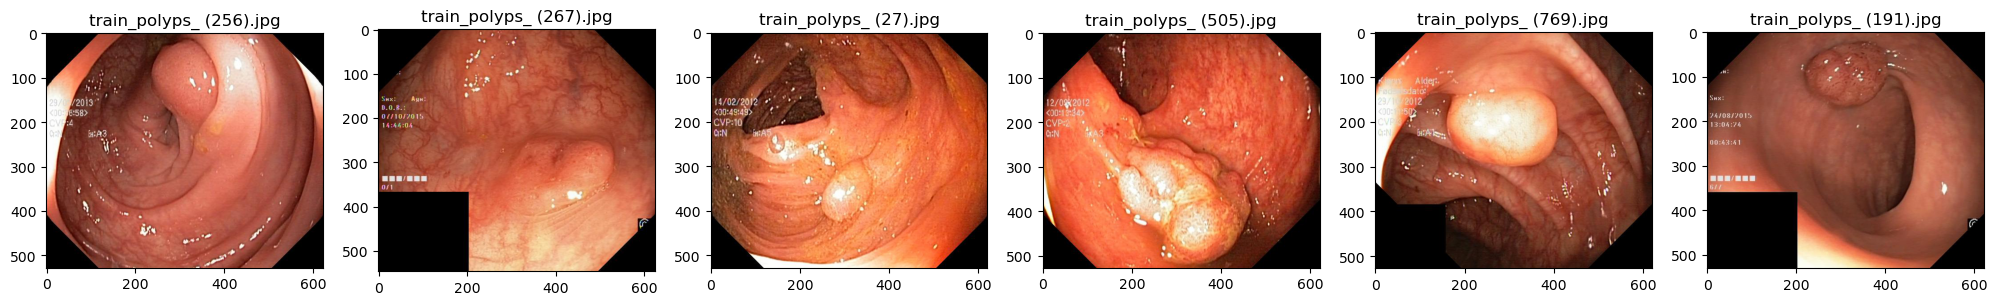

In [5]:
pol_train_folder=r'colon-image-data/train/2_polyps'
plt.figure(figsize=(25, 25))
show_imgs(pol_train_folder)

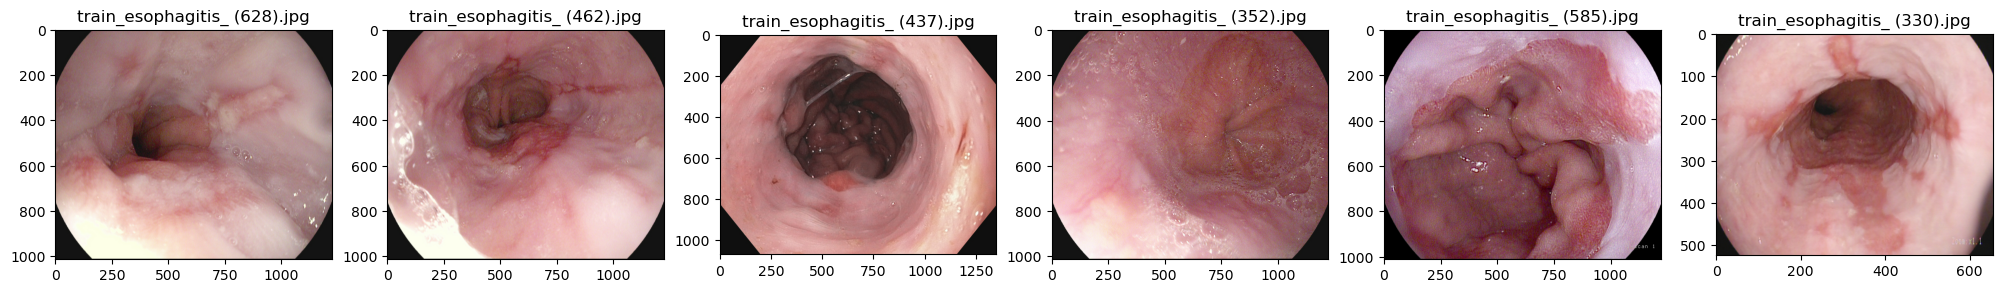

In [6]:
es_train_folder=r'colon-image-data/train/3_esophagitis'
plt.figure(figsize=(25, 25))
show_imgs(es_train_folder)

In [7]:
# Set the path dataset directory
train_path = 'colon-image-data/train/'
test_path = 'colon-image-data/test/'
val_path = 'colon-image-data/val/'
class_names = ['0_normal', 
                '1_ulcerative_colitis', 
                '2_polyps', 
                '3_esophagitis']

#### Train Data Frame

In [8]:
# iterate over files intrain path
files = Path(train_path).glob('*')
for file in files:
    print(file)

colon-image-data\train\0_normal
colon-image-data\train\1_ulcerative_colitis
colon-image-data\train\2_polyps
colon-image-data\train\3_esophagitis


In [9]:
normal_train_images = []
ulcerative_train_images = []
polyp_train_images = []
esophagitis_train_images = []
for images in glob.iglob(f'{normal_train_folder}/*'):
    if (images.endswith(".jpg")):
        normal_train_images.append(images)
for images in glob.iglob(f'{uc_train_folder}/*'):
    if (images.endswith(".jpg")):
        ulcerative_train_images.append(images)
for images in glob.iglob(f'{pol_train_folder}/*'):
    if (images.endswith(".jpg")):
        polyp_train_images.append(images)
for images in glob.iglob(f'{es_train_folder}/*'):
    if (images.endswith(".jpg")):
        esophagitis_train_images.append(images)

In [10]:
train_df = pd.DataFrame({'normal':normal_train_images,'ulcerative':ulcerative_train_images,
                          'polyp':polyp_train_images,'esophagitis':esophagitis_train_images})

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   normal       800 non-null    object
 1   ulcerative   800 non-null    object
 2   polyp        800 non-null    object
 3   esophagitis  800 non-null    object
dtypes: object(4)
memory usage: 25.1+ KB


<Axes: title={'center': 'Train Image Category Quantity'}>

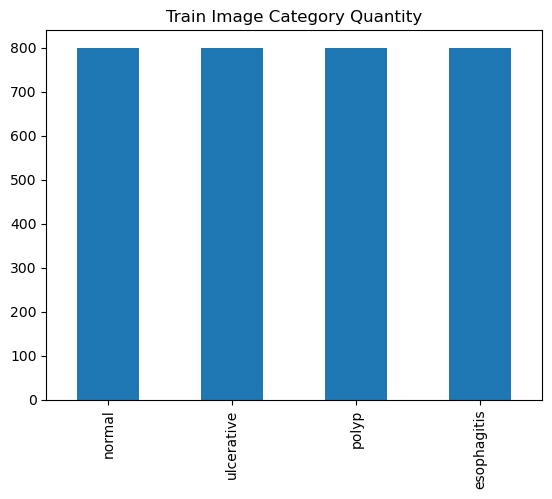

In [97]:
train_df.notnull().sum().plot(kind='bar',title='Train Image Category Quantity')

#### Test Dataframe

In [13]:
# iterate over files in test path
files = Path(test_path).glob('*')
for file in files:
    print(file)

colon-image-data\test\0_normal
colon-image-data\test\1_ulcerative_colitis
colon-image-data\test\2_polyps
colon-image-data\test\3_esophagitis


In [14]:
normal_test_folder = 'colon-image-data/test/0_normal'
uc_test_folder = 'colon-image-data/test/1_ulcerative_colitis'
pol_test_folder = 'colon-image-data/test/2_polyps'
es_test_folder = 'colon-image-data/test/3_esophagitis'

In [15]:
normal_test_images = []
ulcerative_test_images = []
polyp_test_images = []
esophagitis_test_images = []
for images in glob.iglob(f'{normal_test_folder}/*'):
    if (images.endswith(".jpg")):
        normal_test_images.append(images)
for images in glob.iglob(f'{uc_test_folder}/*'):
    if (images.endswith(".jpg")):
        ulcerative_test_images.append(images)
for images in glob.iglob(f'{pol_test_folder}/*'):
    if (images.endswith(".jpg")):
        polyp_test_images.append(images)
for images in glob.iglob(f'{es_test_folder}/*'):
    if (images.endswith(".jpg")):
        esophagitis_test_images.append(images)

In [16]:
test_df = pd.DataFrame({'normal':normal_test_images,'ulcerative':ulcerative_test_images,
                          'polyp':polyp_test_images,'esophagitis':esophagitis_test_images})

In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   normal       200 non-null    object
 1   ulcerative   200 non-null    object
 2   polyp        200 non-null    object
 3   esophagitis  200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


<Axes: title={'center': 'Test Image Category Quantity'}>

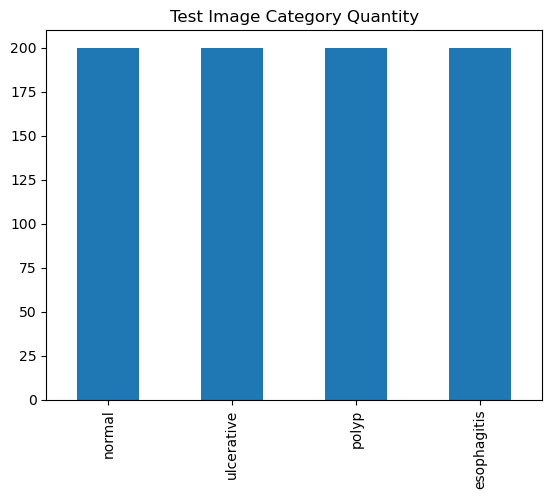

In [96]:
test_df.notnull().sum().plot(kind='bar',title='Test Image Category Quantity')

#### Validation DataFrame

In [19]:
# iterate over files intrain path
files = Path(val_path).glob('*')
for file in files:
    print(file)

colon-image-data\val\0_normal
colon-image-data\val\1_ulcerative_colitis
colon-image-data\val\2_polyps
colon-image-data\val\3_esophagitis


In [20]:
normal_val_folder = 'colon-image-data/val/0_normal'
uc_val_folder = 'colon-image-data/val/1_ulcerative_colitis'
pol_val_folder = 'colon-image-data/val/2_polyps'
es_val_folder = 'colon-image-data/val/3_esophagitis'

In [21]:
normal_val_images = []
ulcerative_val_images = []
polyp_val_images = []
esophagitis_val_images = []
for images in glob.iglob(f'{normal_val_folder}/*'):
    if (images.endswith(".jpg")):
        normal_val_images.append(images)
for images in glob.iglob(f'{uc_val_folder}/*'):
    if (images.endswith(".jpg")):
        ulcerative_val_images.append(images)
for images in glob.iglob(f'{pol_val_folder}/*'):
    if (images.endswith(".jpg")):
        polyp_val_images.append(images)
for images in glob.iglob(f'{es_val_folder}/*'):
    if (images.endswith(".jpg")):
        esophagitis_val_images.append(images)

In [22]:
val_df = pd.DataFrame({'normal':normal_val_images,'ulcerative':ulcerative_val_images,
                          'polyp':polyp_val_images,'esophagitis':esophagitis_val_images})

In [23]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   normal       500 non-null    object
 1   ulcerative   500 non-null    object
 2   polyp        500 non-null    object
 3   esophagitis  500 non-null    object
dtypes: object(4)
memory usage: 15.8+ KB


<Axes: title={'center': 'Validation Image Category Quantity'}>

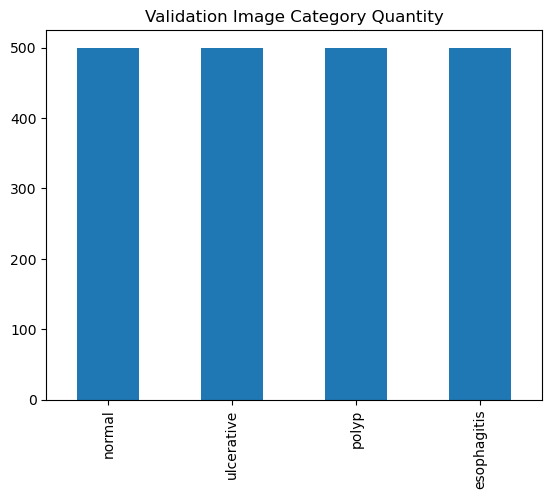

In [95]:
val_df.notnull().sum().plot(kind='bar',title='Validation Image Category Quantity' )

## Normalization

In [25]:
# being with test image
#define normalization function (using 255 since pixel ranges are from 0 to 255)
def normalize(img):
    immin=float(img.min())
    immax=float(img.max())
    return np.floor((img-immin)/(immax-immin)*255)

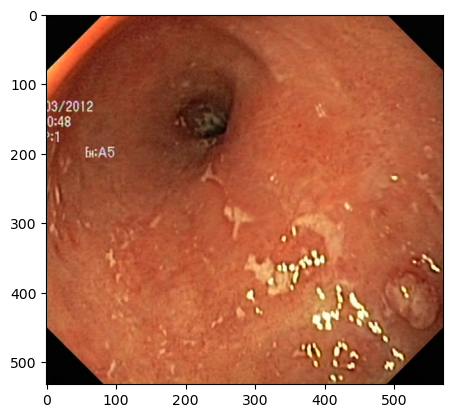

In [26]:
img = plt.imread(r'colon-image-data/train/1_ulcerative_colitis/train_ulcer_ (120).jpg')
plt.imshow(img.astype('uint8'))

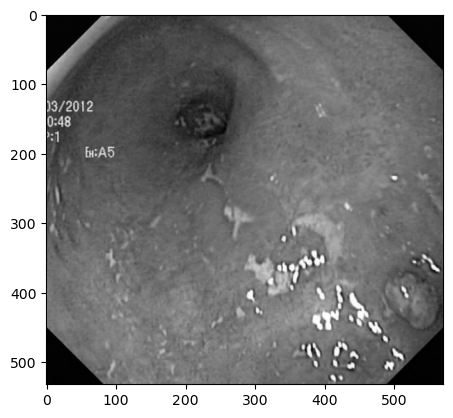

In [27]:
gray_img = skimage.color.rgb2gray(img)
plt.imshow(gray_img, cmap = 'gray')

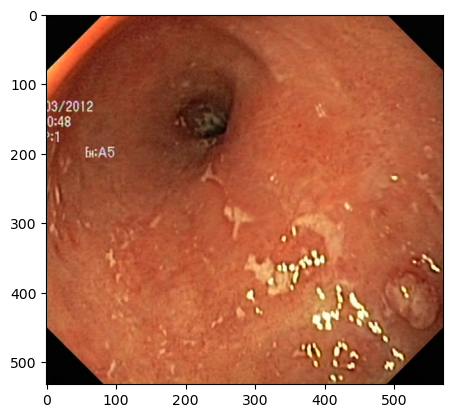

In [28]:
n_img = normalize(img)
plt.imshow(n_img.astype('uint8'))

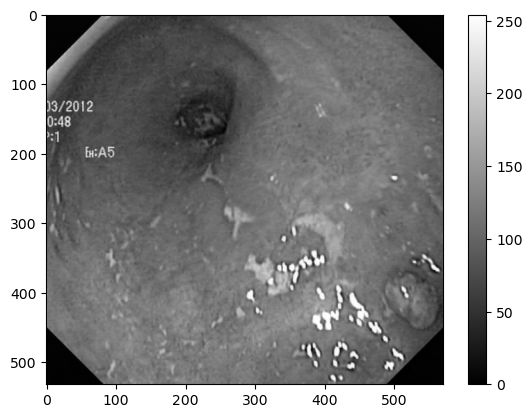

In [29]:
gray_nimg = skimage.color.rgb2gray(n_img)
plt.imshow(gray_nimg, cmap = 'gray')
plt.colorbar()


In [30]:
print(img-n_img)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [31]:
print(gray_img-gray_nimg)

[[-3.98431373 -3.98431373 -3.98431373 ... -4.98039216 -3.98431373
  -3.98431373]
 [-2.98823529 -2.98823529 -2.98823529 ... -3.98431373 -3.98431373
  -3.98431373]
 [-2.98823529 -2.98823529 -2.98823529 ... -2.98823529 -2.98823529
  -2.98823529]
 ...
 [-1.99215686 -1.99215686 -1.99215686 ... -1.99215686 -1.99215686
  -1.99215686]
 [-1.99215686 -1.99215686 -1.99215686 ... -1.99215686 -1.99215686
  -1.99215686]
 [-1.99215686 -1.99215686 -1.99215686 ... -1.99215686 -1.99215686
  -1.99215686]]


In [32]:
#actual normalization in this model will be applied with keras

### Processing using Tensorflow keras

In [81]:
batch_size=32
#scaling performed by deviding by 255
train_datagen = ImageDataGenerator(rescale = 1. / 255,
                                   fill_mode='constant')
val_datagen = ImageDataGenerator(rescale = 1. / 255,
                                 fill_mode='constant')
test_datagen = ImageDataGenerator(rescale = 1. / 255,
                                  fill_mode='constant')

train_gen = train_datagen.flow_from_directory(
        train_path,
        class_mode='categorical',
        batch_size=batch_size,
        seed=42,
        classes=class_names,
        shuffle=False)

val_gen = val_datagen.flow_from_directory(
        val_path,
        class_mode='categorical',
        batch_size=batch_size,
        seed=42,
        classes=class_names,
        shuffle=False)

test_gen = test_datagen.flow_from_directory(
        test_path,
        class_mode='categorical',
        seed=42,
        batch_size=batch_size,
        classes=class_names,
        shuffle=False)

#print samples per class
train_quant = len(train_gen.filenames)
val_quant = len(val_gen.filenames)
test_quant = len(test_gen.filenames)

print("Train samples:", train_quant)
print("Validation samples:", val_quant)
print("Test samples:", test_quant)

#check the class indices
train_gen.class_indices
val_gen.class_indices
test_gen.class_indices

Found 3200 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Train samples: 3200
Validation samples: 2000
Test samples: 800


{'0_normal': 0, '1_ulcerative_colitis': 1, '2_polyps': 2, '3_esophagitis': 3}

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


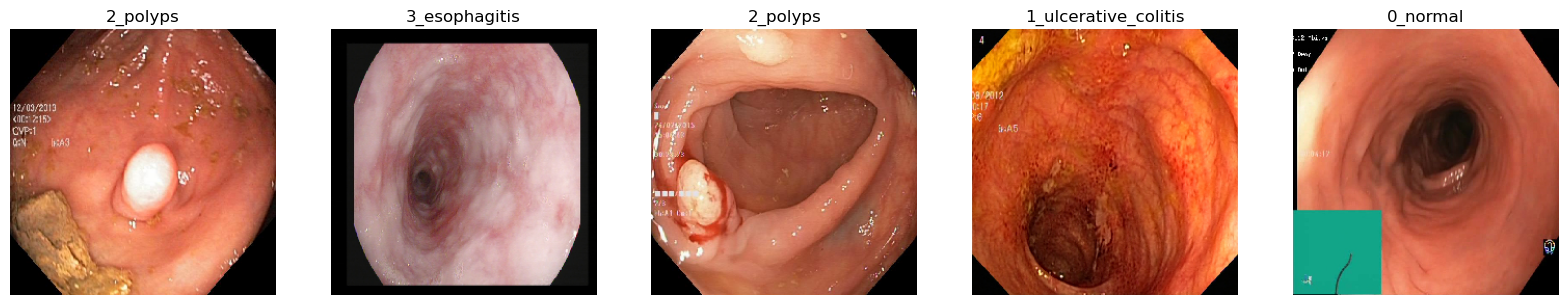

In [34]:
def image_samples(gen ):
    x_dict=gen.class_indices
    classes=list(x_dict.keys())    
    images,labels=next(gen) # get a sample batch from the generator 
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=5
    for i in range(r):        
        plt.subplot(5, 5, i + 1)
        image=images[i]       
        plt.imshow(image)
        print(image.shape)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name)
        plt.axis('off')
    plt.show()
    
image_samples(train_gen)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


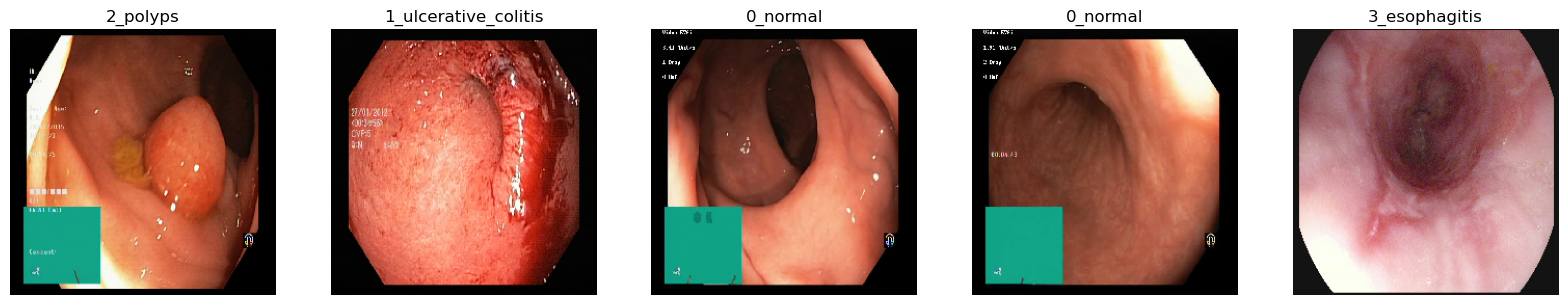

In [36]:
image_samples(test_gen)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


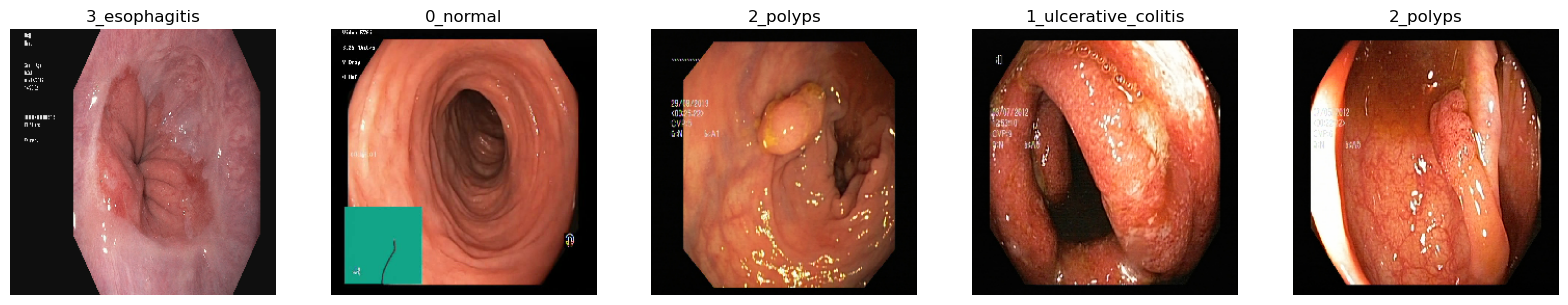

In [37]:
image_samples(val_gen)

## Building model

In [38]:
#apply transfer learning
base_model = tf.keras.applications.InceptionResNetV2(include_top=False, weights='imagenet',
                                                     input_shape=(256,256,3),classes=4)

In [39]:
base_model.trainable=False

In [40]:
model = Sequential()
model.add(base_model)
model.add(BatchNormalization(input_shape=(256,256,3)))
model.add(Conv2D(filters=32, kernel_size=7, padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=5, padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
#model.add(tf.keras.layers.AlphaDropout(0.2))
model.add(Dense(32,activation='relu'))
#model.add(tf.keras.layers.Dropout(0.8))
model.add(Dense(16,activation='relu'))
#model.add(tf.keras.layers.Dropout(0.8))
model.add(Dense(4,activation='softmax'))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 6, 6, 1536)       54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 6, 6, 1536)       6144      
 tchNormalization)                                               
                                                                 
 conv2d_203 (Conv2D)         (None, 6, 6, 32)          2408480   
                                                                 
 conv2d_204 (Conv2D)         (None, 6, 6, 16)          12816     
                                                                 
 conv2d_205 (Conv2D)         (None, 6, 6, 16)          2320      
                                                                 
 global_average_pooling2d (G  (None, 16)               0

In [42]:
early = tf.keras.callbacks.EarlyStopping( patience=3,
                                          min_delta=0.001,
                                          restore_best_weights=True)

In [43]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [44]:
history = model.fit(train_gen, steps_per_epoch=(train_quant/batch_size),
validation_data=val_gen, validation_steps=(val_quant/batch_size),epochs=15, callbacks=[early])

Epoch 1/15
100/100 [==============================] - 968s 10s/step - loss: 0.2822 - accuracy: 0.8934 - val_loss: 0.2271 - val_accuracy: 0.9215
Epoch 2/15
100/100 [==============================] - 958s 10s/step - loss: 0.0813 - accuracy: 0.9756 - val_loss: 0.1459 - val_accuracy: 0.9450
Epoch 3/15
100/100 [==============================] - 924s 9s/step - loss: 0.0623 - accuracy: 0.9809 - val_loss: 0.1515 - val_accuracy: 0.9485
Epoch 4/15
100/100 [==============================] - 945s 9s/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.1428 - val_accuracy: 0.9510
Epoch 5/15
100/100 [==============================] - 928s 9s/step - loss: 0.0227 - accuracy: 0.9928 - val_loss: 0.2189 - val_accuracy: 0.9385
Epoch 6/15
100/100 [==============================] - 940s 9s/step - loss: 0.0196 - accuracy: 0.9944 - val_loss: 0.3808 - val_accuracy: 0.9255
Epoch 7/15
100/100 [==============================] - 931s 9s/step - loss: 0.0484 - accuracy: 0.9887 - val_loss: 0.2643 - val_accuracy: 0.92

## Evaluate Model

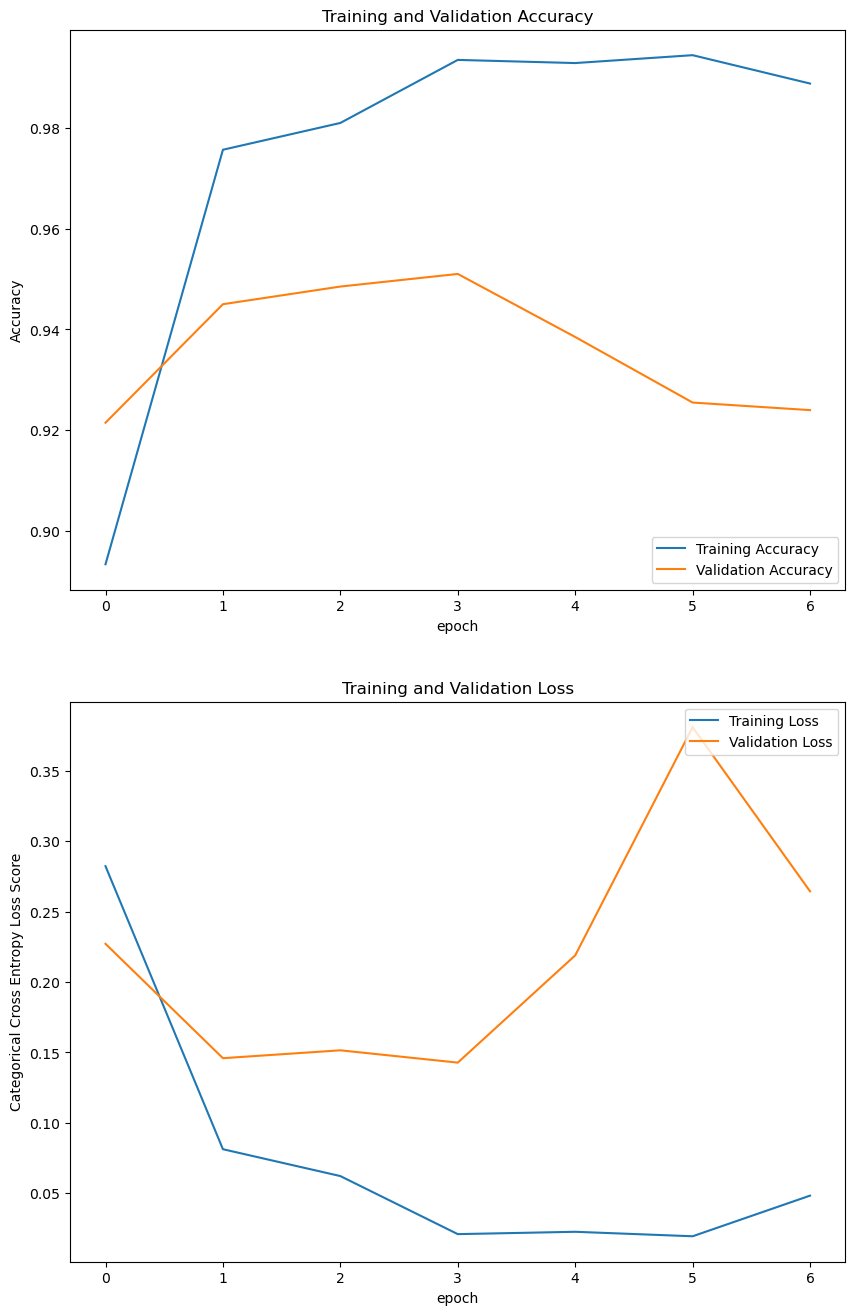

In [93]:
# plot accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.figure(figsize=(10, 16))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.title('Training and Validation Accuracy')

# loss
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical Cross Entropy Loss Score')
plt.title(f'Training and Validation Loss')
plt.xlabel('epoch')

plt.show()


## Test Set Performance

In [78]:
model.evaluate(test_gen)

25/25 [==============================] - 144s 6s/step - loss: 0.1485 - accuracy: 0.9525


[0.14845426380634308, 0.9524999856948853]

In [82]:
test_gen_pred = model.predict(test_gen, test_quant/batch_size, workers=1)

25/25 [==============================] - 150s 6s/step


In [83]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2', '3']
test_gen_lab = test_gen.classes
#print classification report
print(classification_report(test_gen_lab, test_gen_pred.argmax(axis=-1),
                            target_names=target_names, digits=4))

              precision    recall  f1-score   support

           0     0.9950    1.0000    0.9975       200
           1     0.9611    0.8650    0.9105       200
           2     0.8688    0.9600    0.9121       200
           3     0.9949    0.9850    0.9899       200

    accuracy                         0.9525       800
   macro avg     0.9550    0.9525    0.9525       800
weighted avg     0.9550    0.9525    0.9525       800



Normalized confusion matrix
[[1.    0.    0.    0.   ]
 [0.    0.865 0.13  0.005]
 [0.005 0.035 0.96  0.   ]
 [0.    0.    0.015 0.985]]


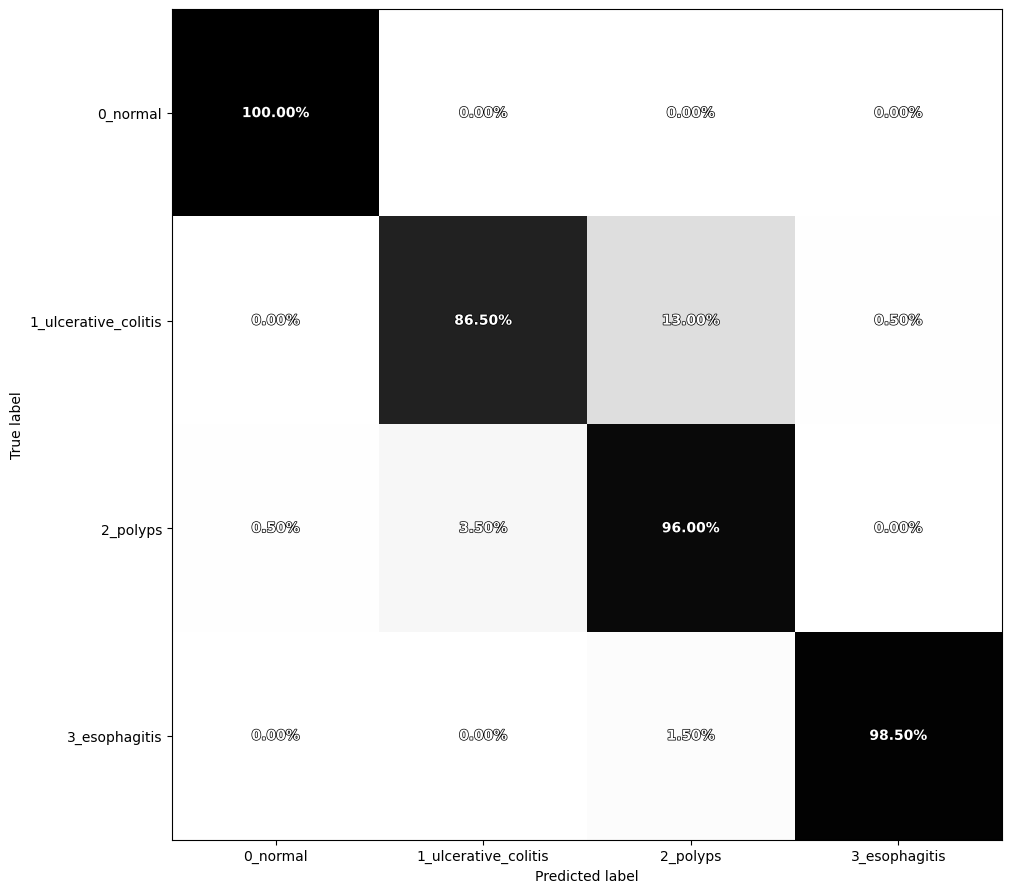

In [128]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.patheffects as path_effects
import itertools
#confusion matrix
test_cnf_matrix = confusion_matrix(test_gen_lab,test_gen_pred.argmax(axis=-1))
def confusion_matrix_test(cm, classes,
                          normalize=True,
                          cmap=plt.cm.binary):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        text = plt.text(j, i, '{:.2f}%'.format(cm[i, j]*100), 
                 fontsize=10, weight='bold',
                 horizontalalignment="center", verticalalignment='center',
                 color="white" if cm[i, j] > thresh else "white")
        text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'), 
        path_effects.Normal()]),

    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix_test = confusion_matrix(test_gen_lab,test_gen_pred.argmax(axis=-1))
np.set_printoptions(precision=4)
# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
confusion_matrix_test(cnf_matrix_test, classes=class_names)
plt.show()

## Validation Set Performance

In [89]:
model.evaluate(val_gen)

63/63 [==============================] - 361s 6s/step - loss: 0.1428 - accuracy: 0.9510


[0.14278821647167206, 0.9509999752044678]

In [90]:
val_gen_pred = model.predict(val_gen, val_quant/batch_size, workers=1)

63/63 [==============================] - 396s 6s/step


In [91]:
#print classification report
val_gen_lab = val_gen.classes
print(classification_report(val_gen_lab, val_gen_pred.argmax(axis=-1),
                            target_names=target_names, digits=4))

              precision    recall  f1-score   support

           0     0.9901    1.0000    0.9950       500
           1     0.9745    0.8400    0.9023       500
           2     0.8630    0.9700    0.9134       500
           3     0.9900    0.9940    0.9920       500

    accuracy                         0.9510      2000
   macro avg     0.9544    0.9510    0.9507      2000
weighted avg     0.9544    0.9510    0.9507      2000



Normalized confusion matrix
[[1.    0.    0.    0.   ]
 [0.    0.84  0.15  0.01 ]
 [0.01  0.02  0.97  0.   ]
 [0.    0.002 0.004 0.994]]


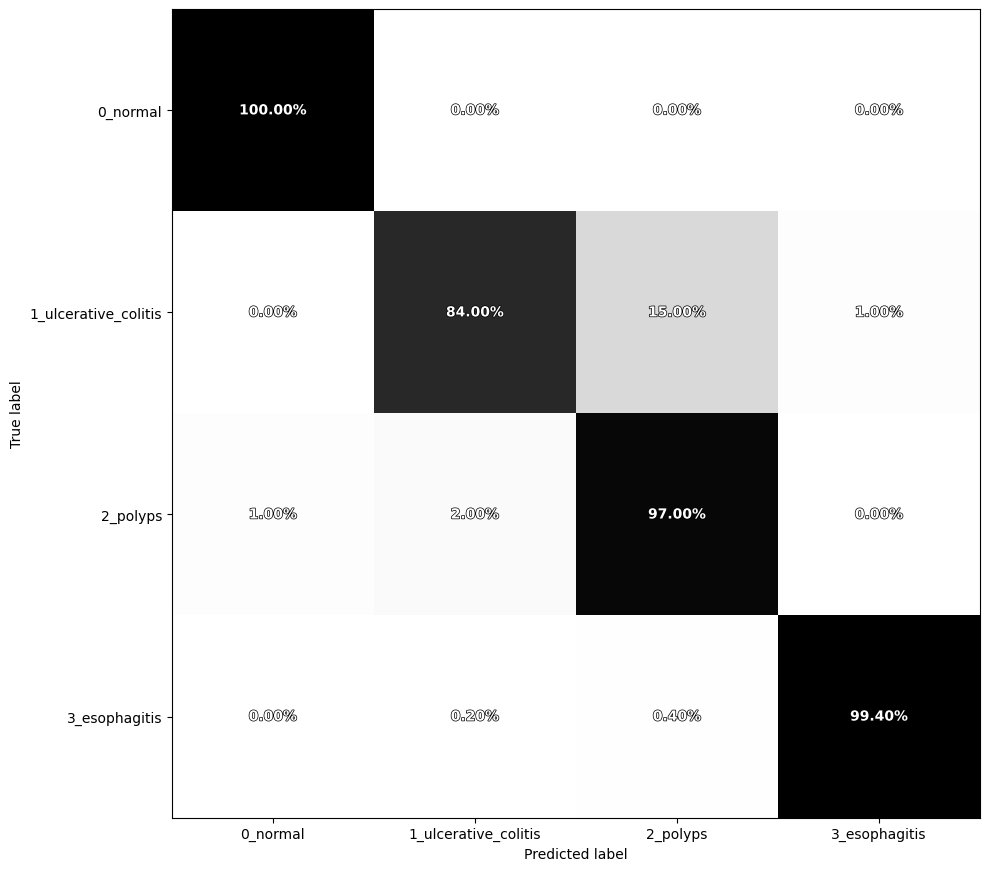

In [109]:
#validation confusion matrix
val_cnf_matrix = confusion_matrix(val_gen_lab,val_gen_pred.argmax(axis=-1))
# Compute confusion matrix
cnf_matrix_val= confusion_matrix(val_gen_lab,val_gen_pred.argmax(axis=-1))
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
confusion_matrix_test(cnf_matrix_val, classes=class_names)
plt.tight_layout()

plt.show()

## Train Set Performance

In [98]:
model.evaluate(train_gen)

100/100 [==============================] - 608s 6s/step - loss: 0.0127 - accuracy: 0.9966


[0.012681021355092525, 0.9965624809265137]

In [116]:
train_gen_pred = model.predict(train_gen, train_quant/batch_size, workers=1)

100/100 [==============================] - 577s 6s/step


In [117]:
#print classification report
train_gen_lab = train_gen.classes
print(classification_report(train_gen_lab, train_gen_pred.argmax(axis=-1),
                            target_names=target_names, digits=4))

              precision    recall  f1-score   support

           0     0.9988    0.9988    0.9988       800
           1     1.0000    0.9912    0.9956       800
           2     0.9889    0.9988    0.9938       800
           3     0.9987    0.9975    0.9981       800

    accuracy                         0.9966      3200
   macro avg     0.9966    0.9966    0.9966      3200
weighted avg     0.9966    0.9966    0.9966      3200



Normalized confusion matrix
[[0.9988 0.     0.0013 0.    ]
 [0.     0.9912 0.0075 0.0013]
 [0.0013 0.     0.9988 0.    ]
 [0.     0.     0.0025 0.9975]]


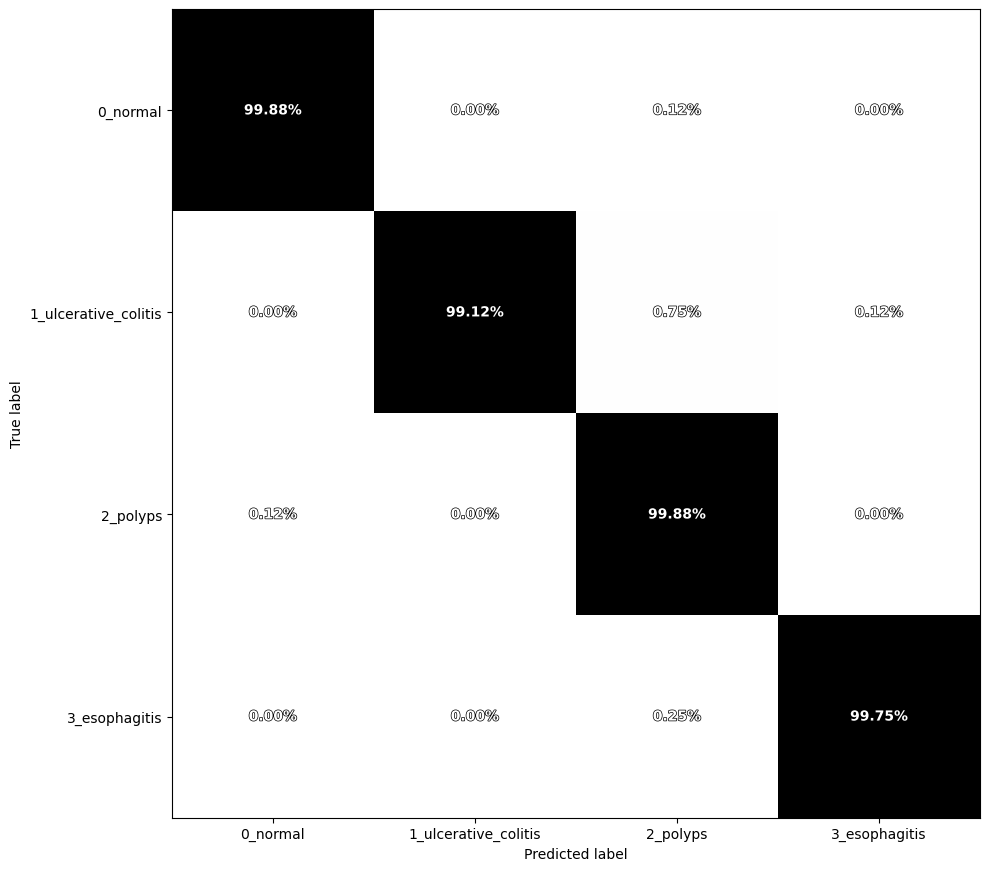

In [122]:
#validation confusion matrix
train_cnf_matrix = confusion_matrix(train_gen_lab, train_gen_pred.argmax(axis=-1))
# Compute confusion matrix
cnf_matrix_train= confusion_matrix(train_gen_lab, train_gen_pred.argmax(axis=-1))
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
confusion_matrix_test(cnf_matrix_train, classes=class_names)
plt.tight_layout()

plt.show()